# Hyper Parameter Tuning

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np   
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# tensorflow and keras
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense 



In [40]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## EDA

<AxesSubplot: xlabel='Outcome', ylabel='Count'>

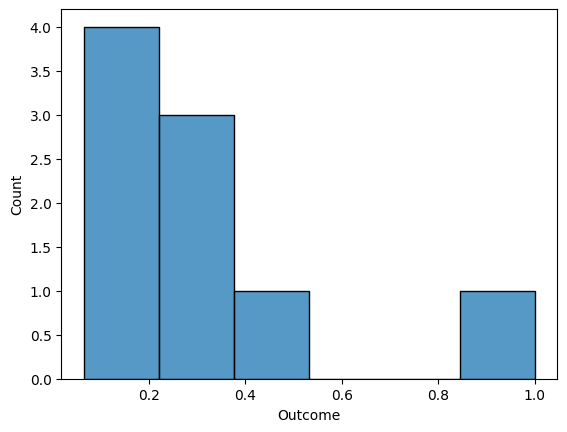

In [41]:
sns.histplot(df.corr()['Outcome'])

In [42]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [43]:
df.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [44]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']

## Trani test split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.20, random_state=42)

## Scaling

In [46]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model building

In [53]:
model = Sequential(name='kerasTuning')
model.add(Dense(16,input_dim = 8,activation='relu',name= 'input_layer'))
model.add(Dense(64,activation = 'relu',name = 'hiddel_layer'))
model.add(Dense(1,activation = 'sigmoid',name = 'output_layer'))
model.compile(optimizer = 'Adam',loss = 'binary_crossentropy',metrics=['accuracy'])

In [55]:
model.summary()

Model: "kerasTuning"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 16)                144       
                                                                 
 hiddel_layer (Dense)        (None, 64)                1088      
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 1,297
Trainable params: 1,297
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train,y_train,epochs=100,validation_split=0.2,batch_size=32)

Epoch 1/100
15/15 [==============================] - 1s 18ms/step - loss: 0.6644 - accuracy: 0.6609 - val_loss: 0.6351 - val_accuracy: 0.6983
Epoch 2/100
15/15 [==============================] - 0s 6ms/step - loss: 0.5976 - accuracy: 0.7239 - val_loss: 0.6062 - val_accuracy: 0.6552
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5474 - accuracy: 0.7500 - val_loss: 0.5705 - val_accuracy: 0.7069
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5079 - accuracy: 0.7717 - val_loss: 0.5437 - val_accuracy: 0.7414
Epoch 5/100
15/15 [==============================] - 0s 9ms/step - loss: 0.4823 - accuracy: 0.7783 - val_loss: 0.5298 - val_accuracy: 0.7414
Epoch 6/100
15/15 [==============================] - 0s 6ms/step - loss: 0.4655 - accuracy: 0.7826 - val_loss: 0.5187 - val_accuracy: 0.7414
Epoch 7/100
15/15 [==============================] - 0s 4ms/step - loss: 0.4543 - accuracy: 0.7826 - val_loss: 0.5062 - val_accuracy: 0.7414
Epoch 8/100


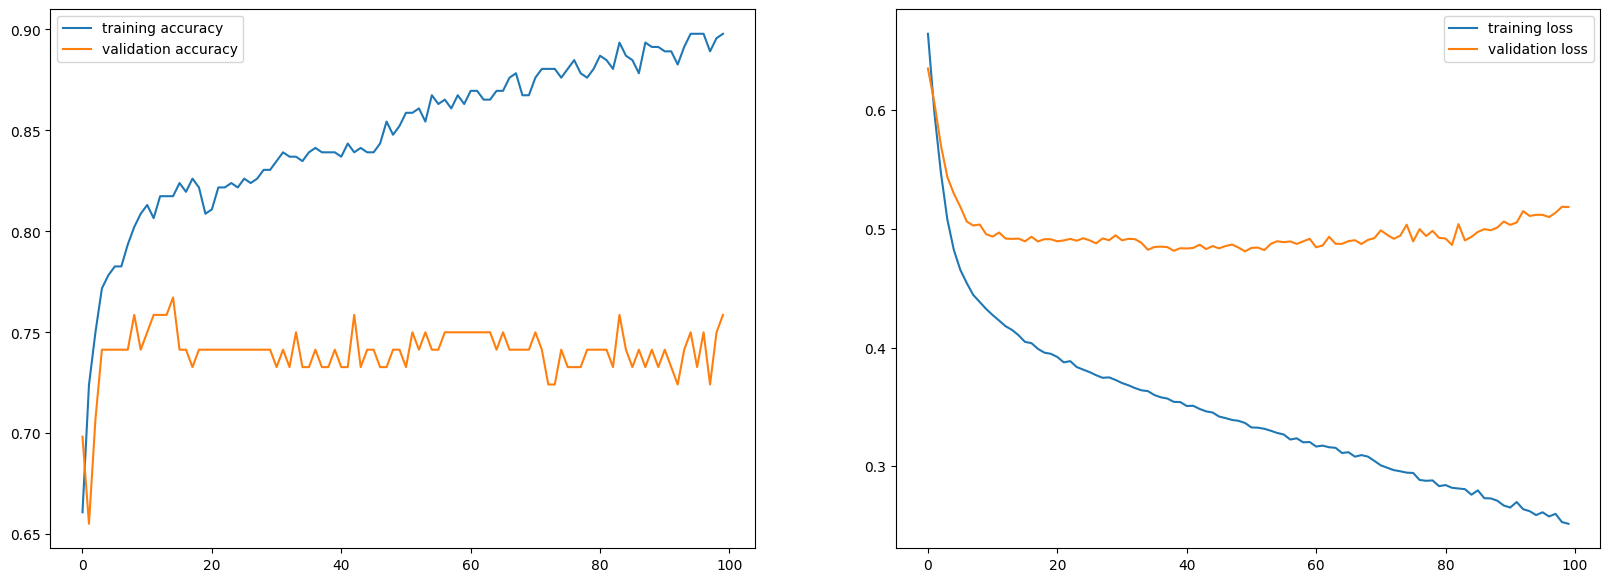

In [ ]:
plt.subplots(nrows=1,ncols=2,figsize = (20,7))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training accuracy','validation accuracy'])
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss','validation loss'])
